<h2>Fashion MNIST dataset in Keras library</h2>

<h2>Load data</h2>

In [1]:
# Imports
# - Dataset
from keras.datasets import fashion_mnist
# - Helper libraries
import numpy as np
import pandas as pd
import time
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils
# - Graph plots
%matplotlib inline
from matplotlib import pyplot as plt
# - Keras models and layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Flatten, Convolution2D, MaxPooling2D
from keras.callbacks import EarlyStopping

# Ignore warnings
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

# Load pre-shuffled Fashion MNIST data into train and test sets
(X_train, y_train_raw), (X_test, y_test_raw) = fashion_mnist.load_data()

# Convert to float values and normalize between 0...1
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255 
X_test /= 255

# Preprocess class labels
# Convert labels to 10-dimensional one-hot vectors
y_train = np_utils.to_categorical(y_train_raw, 10)
y_test = np_utils.to_categorical(y_test_raw, 10)

print("Training instances: {}".format(X_train.shape[0]))
print("Test instances: {}".format(X_test.shape[0]))
print()
print("Structure of training set: {}".format(X_train.shape))
print("Structure of labels set: {}".format(y_train.shape))

Using TensorFlow backend.


Training instances: 60000
Test instances: 10000

Structure of training set: (60000, 28, 28)
Structure of labels set: (60000, 10)


<h2>Pre-process data for 1D or 2D inputs</h2>

In [2]:
# Preprocess for 1D input data
X_train_1D = X_train.reshape(X_train.shape[0], 784)
X_test_1D = X_test.reshape(X_test.shape[0], 784)
print("1D shape:", X_train_1D.shape)

# Preprocess for 2D input data
X_train_2D = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_2D = X_test.reshape(X_test.shape[0], 28, 28, 1)
print("2D shape:", X_train_2D.shape)

1D shape: (60000, 784)
2D shape: (60000, 28, 28, 1)


<h2>Build Linear model</h2>

In [3]:
# Create Linear Softmax model
lin_clf = Sequential()
lin_clf.add(Dense(10, input_dim=784, activation="softmax"))

# Compile model
lin_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(lin_clf.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


<h2>Train and evaluate Linear model on test data</h2>

In [4]:
# Start timer
start = time.time()

# Train model on training data
lin_clf.fit(X_train_1D, y_train, batch_size=32, epochs=8, verbose=1)
# Evaluate model on test data
score = lin_clf.evaluate(X_test_1D, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

Epoch 1/8
60000/60000 [==============================] - 2s 36us/step - loss: 0.6011 - acc: 0.7976
Epoch 2/8
60000/60000 [==============================] - 2s 31us/step - loss: 0.4624 - acc: 0.8427
Epoch 3/8
60000/60000 [==============================] - 2s 30us/step - loss: 0.4355 - acc: 0.8517
Epoch 4/8
60000/60000 [==============================] - 2s 29us/step - loss: 0.4233 - acc: 0.8540
Epoch 5/8
60000/60000 [==============================] - 2s 30us/step - loss: 0.4136 - acc: 0.8573: 0s - loss: 0.4138 - acc: 
Epoch 6/8
60000/60000 [==============================] - 2s 36us/step - loss: 0.4071 - acc: 0.8589
Epoch 7/8
60000/60000 [==============================] - 2s 38us/step - loss: 0.4026 - acc: 0.8609
Epoch 8/8
60000/60000 [==============================] - 2s 38us/step - loss: 0.3983 - acc: 0.8611: 1s - loss: 

Test Accuracy: 84.44%
Time elapsed: 16.47 sec


<h2>Build Neural Net model</h2>

In [5]:
# Create Neural Net Softmax model
nn_clf = Sequential()
nn_clf.add(Dense(128, input_dim=784, activation="relu"))
nn_clf.add(Dropout(0.2))
nn_clf.add(Dense(128, activation="relu"))
nn_clf.add(Dropout(0.2))
nn_clf.add(Dense(10, activation="softmax"))

# Compile model
nn_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(nn_clf.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


<h2>Train and evaluate Neural Net model on test data</h2>

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 127us/step - loss: 0.5820 - acc: 0.7918 - val_loss: 0.4045 - val_acc: 0.8537
Epoch 2/10
48000/48000 [==============================] - 6s 115us/step - loss: 0.4279 - acc: 0.8439 - val_loss: 0.3780 - val_acc: 0.8618
Epoch 3/10
48000/48000 [==============================] - 5s 109us/step - loss: 0.3914 - acc: 0.8582 - val_loss: 0.3669 - val_acc: 0.8694
Epoch 4/10
48000/48000 [==============================] - 5s 114us/step - loss: 0.3677 - acc: 0.8663 - val_loss: 0.3661 - val_acc: 0.8672
Epoch 5/10
48000/48000 [==============================] - 6s 119us/step - loss: 0.3515 - acc: 0.8702 - val_loss: 0.3520 - val_acc: 0.8722
Epoch 6/10
48000/48000 [==============================] - 5s 112us/step - loss: 0.3381 - acc: 0.8751 - val_loss: 0.3435 - val_acc: 0.8744
Epoch 7/10
48000/48000 [==============================] - 5s 107us/step - loss: 0.3264 - acc: 0.8775 - val_loss: 0.3510 - 

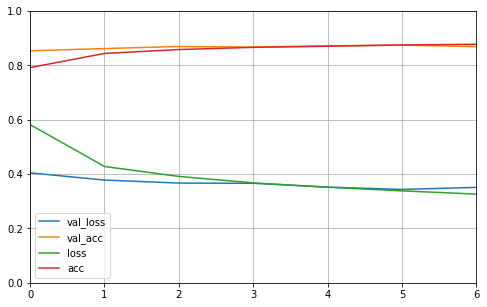

In [6]:
# Early stopping
cp = EarlyStopping(patience=1, restore_best_weights=True)

# Start timer
start = time.time()

# Train model on training data
history = nn_clf.fit(X_train_1D, y_train, batch_size=32, epochs=10, validation_split=0.2, callbacks=[cp], verbose=1)
# Evaluate model on test data
score = nn_clf.evaluate(X_test_1D, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

# Plot training history
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
plt.show()

<h2>Build ConvNet model</h2>

In [7]:
# Create ConvNet model
cnn_clf = Sequential()
# - Conv layers
cnn_clf.add(Convolution2D(32, (5,5), activation="relu", input_shape=(28,28,1)))
cnn_clf.add(MaxPooling2D(pool_size=(2,2))) # reduces size to 14x14
cnn_clf.add(Convolution2D(32, (5,5), activation="relu"))
cnn_clf.add(MaxPooling2D(pool_size=(2,2))) # reduces size to 7x7
# - Fully connected layers
cnn_clf.add(Flatten())
cnn_clf.add(Dense(256, activation="relu"))
cnn_clf.add(Dropout(0.3))
cnn_clf.add(Dense(10, activation="softmax"))
        
# Compile model
cnn_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(cnn_clf.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
__________

<h2>Train and evaluate ConvNet model on test data</h2>

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 27s 564us/step - loss: 0.7443 - acc: 0.7321 - val_loss: 0.4700 - val_acc: 0.8295
Epoch 2/15
48000/48000 [==============================] - 27s 556us/step - loss: 0.4454 - acc: 0.8392 - val_loss: 0.3907 - val_acc: 0.8563
Epoch 3/15
48000/48000 [==============================] - 27s 556us/step - loss: 0.3774 - acc: 0.8637 - val_loss: 0.3572 - val_acc: 0.8716
Epoch 4/15
48000/48000 [==============================] - 26s 535us/step - loss: 0.3405 - acc: 0.8760 - val_loss: 0.3334 - val_acc: 0.8792
Epoch 5/15
48000/48000 [==============================] - 28s 592us/step - loss: 0.3161 - acc: 0.8841 - val_loss: 0.3069 - val_acc: 0.8900
Epoch 6/15
48000/48000 [==============================] - 26s 532us/step - loss: 0.2954 - acc: 0.8930 - val_loss: 0.2960 - val_acc: 0.8937
Epoch 7/15
48000/48000 [==============================] - 25s 523us/step - loss: 0.2814 - acc: 0.8974 - val_loss: 0.

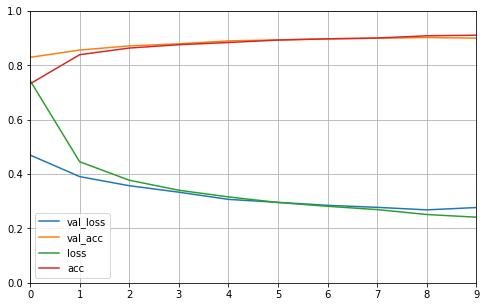

In [8]:
# Start timer
start = time.time()

# Store best model
cp = EarlyStopping(patience=1, restore_best_weights=True)

# Train model on training data
# Note: uses 20% of the training set for validation
history = cnn_clf.fit(X_train_2D, y_train, batch_size=256, epochs=15, validation_split=0.2, callbacks=[cp], verbose=1)
# Evaluate model on test data
score = cnn_clf.evaluate(X_test_2D, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

# Plot training history
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
plt.show()

<h2>Confusion matrix</h2>

In [9]:
# Make predictions
y_pred = cnn_clf.predict(X_test_2D)

# Confusion matrix
conf_mx = confusion_matrix(
    np.argmax(y_test,axis=1), 
    np.argmax(y_pred, axis=1))
print(conf_mx)

[[858   0  15  17   4   1  98   0   7   0]
 [  2 973   0  18   2   0   3   0   2   0]
 [ 15   0 874  12  49   0  49   0   1   0]
 [ 14   2   7 924  16   0  35   0   2   0]
 [  1   0  88  41 803   0  66   0   1   0]
 [  0   0   0   0   0 970   0  14   0  16]
 [118   0  84  26  62   0 698   0  12   0]
 [  0   0   0   0   0  14   0 949   0  37]
 [  1   0   6   3   2   1   3   5 979   0]
 [  0   0   0   0   0   2   0  25   1 972]]


<h2>Dimensionality Reduction</h2>

In [10]:
from sklearn.decomposition import PCA

# Create PCA
pca = PCA(n_components=0.95)
pca.fit(X_train_1D)
# Reduce dimensionality on training and test sets
X_train_1D_dr = pca.transform(X_train_1D)
X_test_1D_dr = pca.transform(X_test_1D)
# Show dataset shape
print("Training set:",X_train_1D_dr.shape)
print("Test set:",X_test_1D_dr.shape)

Training set: (60000, 187)
Test set: (10000, 187)


<h2>Train and evaluate reduced dataset with a neural network</h2>

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 34us/step - loss: 0.5486 - acc: 0.8133 - val_loss: 0.3823 - val_acc: 0.8636
Epoch 2/20
48000/48000 [==============================] - 1s 24us/step - loss: 0.3391 - acc: 0.8775 - val_loss: 0.3366 - val_acc: 0.8782
Epoch 3/20
48000/48000 [==============================] - 1s 23us/step - loss: 0.2963 - acc: 0.8917 - val_loss: 0.3204 - val_acc: 0.8830
Epoch 4/20
48000/48000 [==============================] - 1s 25us/step - loss: 0.2672 - acc: 0.9031 - val_loss: 0.3119 - val_acc: 0.8842
Epoch 5/20
48000/48000 [==============================] - 1s 24us/step - loss: 0.2446 - acc: 0.9114 - val_loss: 0.3106 - val_acc: 0.8863
Epoch 6/20
48000/48000 [==============================] - 1s 22us/step - loss: 0.2240 - acc: 0.9190 - val_loss: 0.3088 - val_acc: 0.8897
Epoch 7/20
48000/48000 [==============================] - 1s 25us/step - loss: 0.2051 - acc: 0.9256 - val_loss: 0.3084 - val_acc

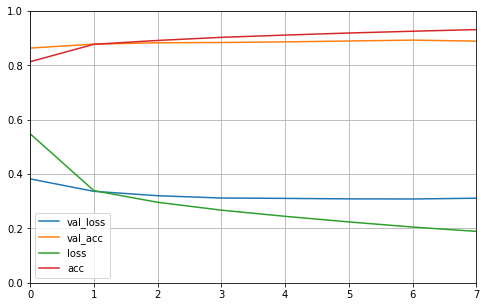

In [17]:
# Create Neural Net Softmax model
snn_clf = Sequential()
snn_clf.add(Dense(128, input_dim=187, activation="relu"))
nn_clf.add(Dropout(0.2))
snn_clf.add(Dense(128, activation="relu"))
nn_clf.add(Dropout(0.2))
snn_clf.add(Dense(10, activation="softmax"))

# Early stopping
cp = EarlyStopping(patience=2, restore_best_weights=True)

# Compile model
snn_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Start timer
start = time.time()

# Train model on training data
history = snn_clf.fit(X_train_1D_dr, y_train, batch_size=128, epochs=20, validation_split=0.2, callbacks=[es], verbose=1)
# Evaluate model on test data
score = snn_clf.evaluate(X_test_1D_dr, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

# Plot training history
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
plt.show()

<h2>Predict examples</h2>

Predicted: Ankle boot
Actual: Ankle boot


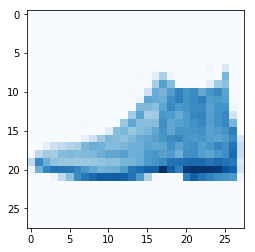

Predicted: Pullover
Actual: Pullover


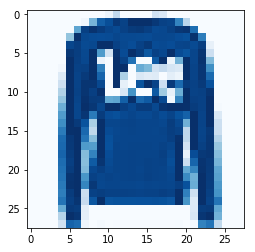

Predicted: Trouser
Actual: Trouser


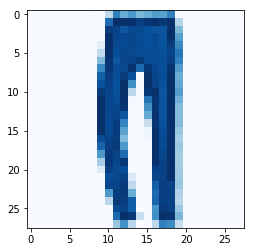

In [18]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Examples to classify
examples = X_test_2D[:3]

res = np.argmax(cnn_clf.predict(examples), axis=1)

for i in range(0,len(res)):
    print("Predicted:",class_names[res[i]])
    print("Actual:",class_names[y_test_raw[i]])
    plt.imshow(X_test[i], cmap=plt.cm.Blues)
    plt.show()